## Program N0.5 : Implement Euclidean Distance for two features then perform clustering using Kmeans algorithm and visualize the clusters

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

sns.set_theme(style="darkgrid")
#plt.rcParams['figure.figsize'] = [12,6]

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(columns="CustomerID",inplace=True)

In [6]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.duplicated().any() #for duplicate value

False

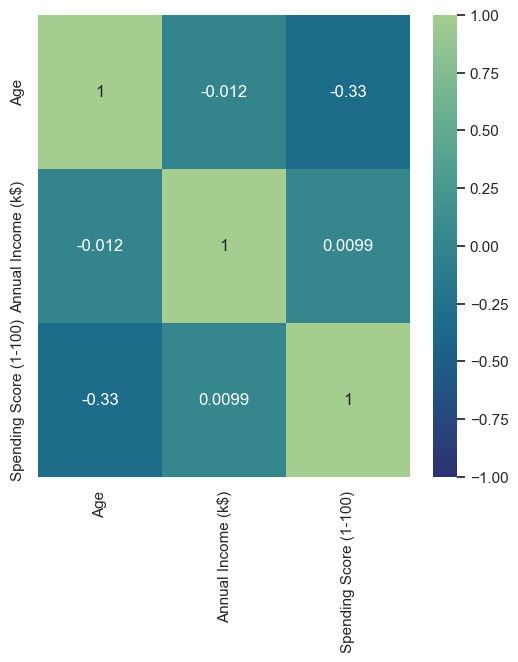

In [15]:
plt.rcParams['figure.figsize'] = [6,6]
sns.heatmap(df.corr(), vmax=1, vmin=-1,cmap='crest_r', annot=True)
plt.show()

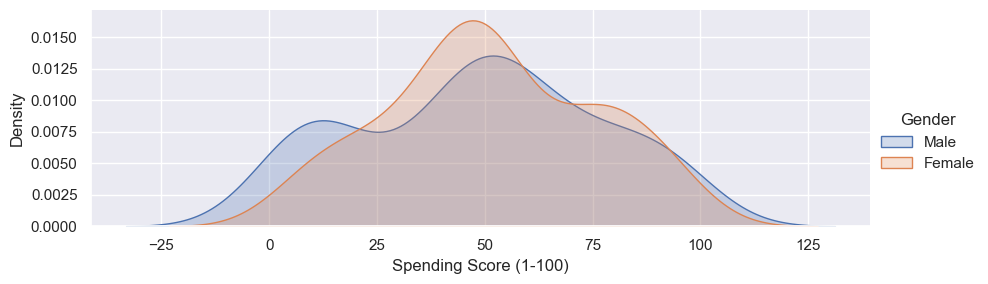

In [31]:
facet = sns.FacetGrid(df, hue = "Gender", aspect = 3)
facet.map(sns.kdeplot,"Spending Score (1-100)",shade= True)
facet.add_legend()
plt.show()

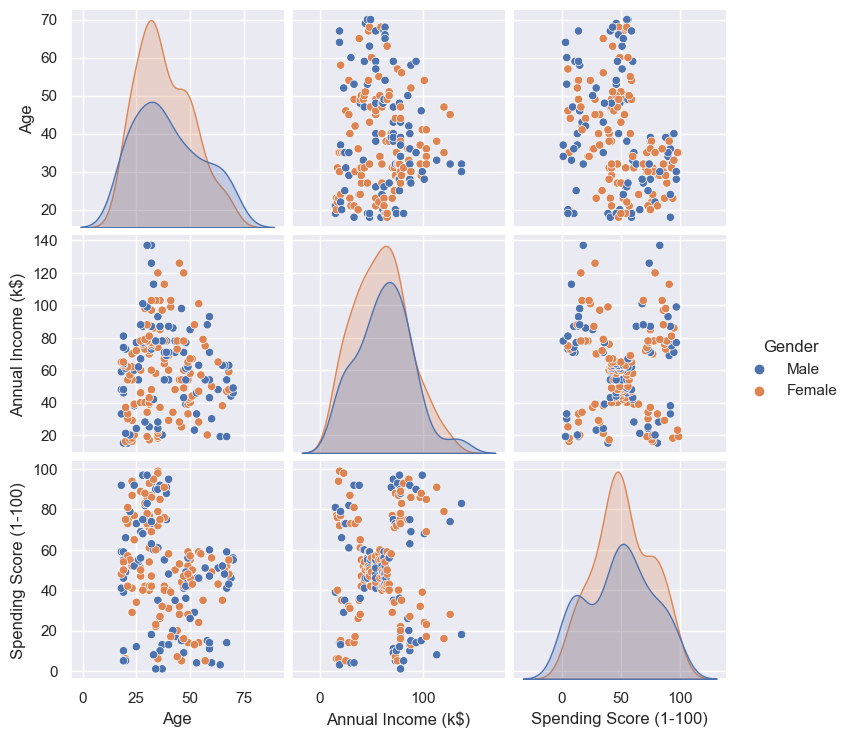

In [20]:
sns.pairplot(df,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

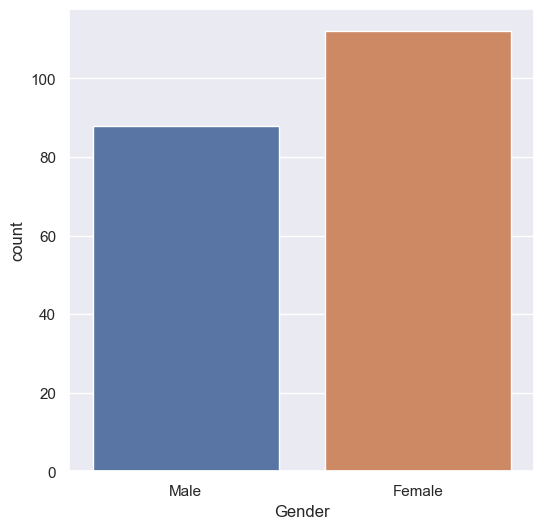

In [24]:
sns.countplot(df["Gender"])

In [32]:
df['Gender'].replace(["Male","Female"],[0,1],inplace=True)

In [111]:
x=df.iloc[:,2:4]

## Kmeans

In [69]:
from sklearn.cluster import KMeans

In [98]:
# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=5, random_state=42) #randomly 
kmeans_model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [99]:
# Predict clusters and find centroids
y_kmeans = kmeans_model.predict(x)
centroids = kmeans_model.cluster_centers_

In [119]:
# Silhouette Score
silhouette_avg = silhouette_score(x, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4565077334305076


# Elbow method

In [101]:
inertia = kmeans_model.inertia_
print("Inertia:", inertia)

Inertia: 44448.45544793371


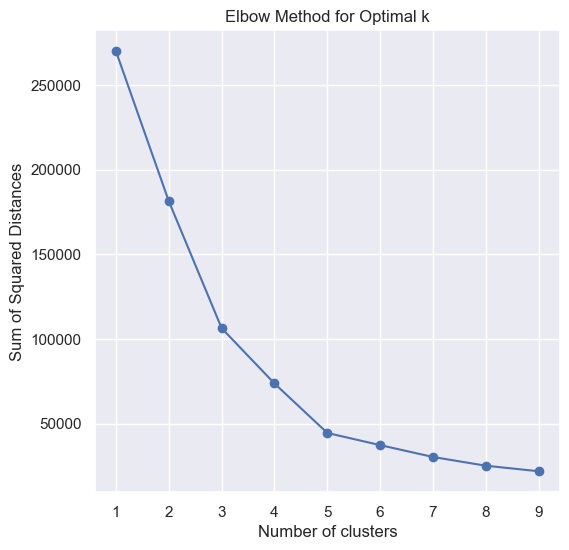

In [102]:
sse=[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

# GRid Search cv

In [112]:
# Define a range of K values to try
param_grid = {'n_clusters': [ 4, 5, 6,7,8,9]}

In [113]:
# Perform grid search using silhouette score as the scoring metric
grid_search = GridSearchCV(kmeans_model, param_grid, cv=5)
grid_search.fit(x)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=9, random_state=42),
             param_grid={'n_clusters': [4, 5, 6, 7, 8, 9]})

In [114]:
grid_search.best_params_

{'n_clusters': 9}

In [115]:
kmeans_model = KMeans(n_clusters=9, random_state=42) #randomly 
kmeans_model.fit(x)

KMeans(n_clusters=9, random_state=42)

In [116]:
# Predict clusters and find centroids
y_kmeans = kmeans_model.predict(x)
centroids = kmeans_model.cluster_centers_

Text(0.5, 1.0, 'K-Means Clustering')

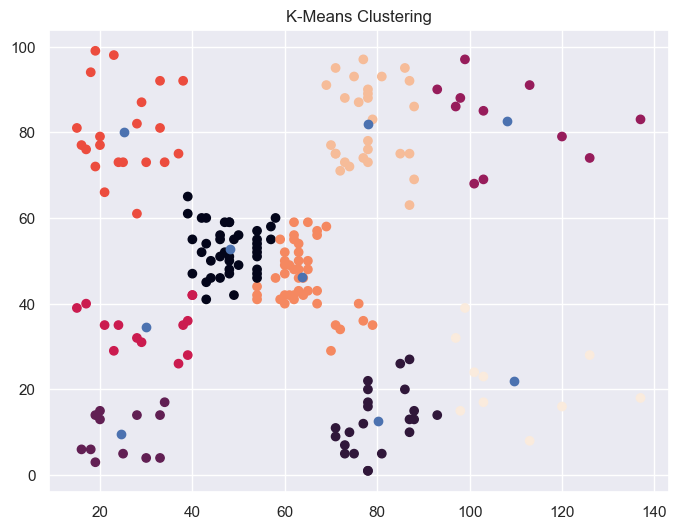

In [126]:
# Visualize clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points with different colors based on their cluster assignments
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans )

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o')

plt.title('K-Means Clustering')

In [100]:
# Silhouette Score
silhouette_avg = silhouette_score(x, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.553931997444648


In [117]:
df["cluster"]=kmeans_model.fit_predict(x)

In [118]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,4
1,0,21,15,81,5
2,1,20,16,6,2
3,1,23,16,77,5
4,1,31,17,40,4


In [120]:
df.cluster.value_counts()

6    43
0    40
7    28
1    22
5    21
4    13
2    12
3    11
8    10
Name: cluster, dtype: int64